In [8]:
#-- Draw anomalies for 1997 and 1998
# idir = "/g/data/p66/ars599/mo_gc3/cq317/apm.pp/netCDF/20*.nc"
%matplotlib inline
import os
import pandas as pd
from netCDF4 import  num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.basemap import Basemap

import os
os.getcwd()

%cd /home/599/ars599/Documents/a10/

import glob
print(glob.glob("/home/599/ars599/Documents/a10/*nc"))



/home/599/ars599/Documents/a10
['/home/599/ars599/Documents/a10/HadISST_sst.1979-2020.nc']


In [17]:
#-- Do step1-step4 with one line without temporaly files using "piping".
import xarray as xr
import pandas as pd

fName = 'HadISST_sst.1979-2020.nc'
f2 = xr.open_dataset(fName)
f3 = xr.open_dataset(fName, decode_times=False) # have to use this one or no more calendar!!!

sst = f2.sst
sst_clim = sst.groupby('time.month').mean(dim='time')
sst_anom = sst.groupby('time.month') - sst_clim
f2

<xarray.Dataset>
Dimensions:    (time: 504, longitude: 360, latitude: 180)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    title:        Monthly version of HadISST sea surface temperature component
    history:      Sat Apr 09 10:50:24 2022: cdo selyear,1979/2020 HadISST_sst...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

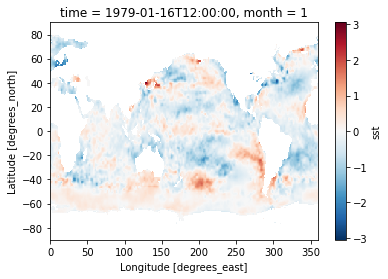

In [18]:
%matplotlib inline
sst_anom[0].plot()

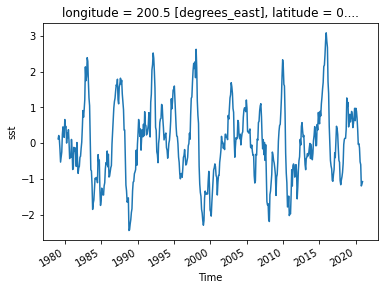

In [19]:
sst_ref = sst_anom.sel(longitude=200, latitude=0, method='nearest')
sst_ref.plot()

In [21]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

Text(0.5, 1.0, 'Correlation btw. global SST Anomaly and SST Anomaly at one point')

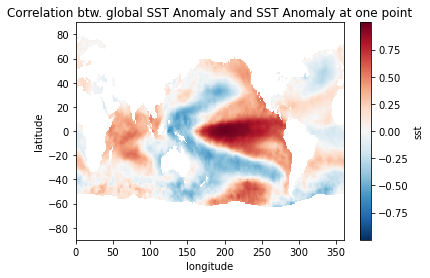

In [22]:
sst_cor = corrrelation(sst_anom, sst_ref, dims='time')
pc = sst_cor.plot()
pc.axes.set_title('Correlation btw. global SST Anomaly and SST Anomaly at one point')

In [ ]:
def fix_calendar(ds, timevar='T'):
    if ds[timevar].attrs['calendar'] == '360':
        ds[timevar].attrs['calendar'] = '360_day'
    return ds

ds = fix_calendar(ds)
ds = xr.decode_cf(ds)
ds

In [89]:
anom = f2.variables["sst"] #read anomaly from previous resuts
time = f2.variables["time"] #read time
dlons = f2.variables["longitude"][:] # read longitudes
dlats = f2.variables["latitude"][:] # read latitudes

#ndate = num2date(time[:],units=time.units,calendar=time.calendar) #convert time to date
#dates = pd.DatetimeIndex(ndate) # convert date to date object in pandas
f2 = xr.open_dataset('HadISST_sst.1979-2020.nc')
f2.time

<xarray.DataArray 'time' (time: 504)>
array(['1979-01-16T12:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-16T12:00:00.000000000', ..., '2020-10-16T12:00:00.000000000',
       '2020-11-16T12:00:00.000000000', '2020-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2020-12-16T12:00:00
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

In [75]:
syear=1997 # start of plot
eyear=1998 # end of plot

fig = plt.figure(figsize=(24,24)) # set figure environemnt

contours=np.arange(-4.0,4.0,0.5) # set contours
cmap=cm.bwr # set colormap
smon={1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"} # set dictionary

ii=1
for year in range(syear,eyear+1): #loop for each year
   idxs = np.where(dates.year == year)[0]

   for im, idx in enumerate(idxs): #loop for each month in a year

     ax = plt.subplot(6,4,ii) # set up panel plot
     m = Basemap(projection='mill',llcrnrlat=dlats[0], urcrnrlat=dlats[-1], llcrnrlon=dlons[0],urcrnrlon=dlons[-1], 
                 lat_ts=5, resolution='c') # draw basemap
     m.drawcoastlines() # draw coast line
    
     flon,flat=np.meshgrid(dlons,dlats) # meshgrid
     x,y=m(flon,flat) # lon,lat => x,y

     cs = m.contourf(x,y,anom[idx,0,:,:],contours, cmap=cmap, extend="both") # plot contours

     ax.text(0.015,0.9, "%4.4i %s" % (year, smon[im+1]), transform=ax.transAxes, fontsize=20, bbox=dict(boxstyle='square',
            fc='w', alpha=1.0), zorder=100) # draw label

     ii=ii+1

# set up label
cax = fig.add_axes([0.2, -0.050, 0.6, 0.03]) 
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('SST Anomaly [K]', fontsize=20)
art.ax.tick_params(labelsize=18)

# adjust layout
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.3)

# show
plt.show()

NameError: name 'dates' is not defined

<Figure size 1728x1728 with 0 Axes>